In [1]:
#outliers...
import pandas as pd
import numpy as np

# File path to your dataset
file_path = 'C:/Users/ADMIN/Downloads/fashion_product_data.ldjson'

# Load the Line-delimited JSON (ldjson) dataset
df = pd.read_json(file_path, lines=True)

# Check for missing values
missing_values = df.isnull().sum()

# Remove columns with more than 20% missing values
threshold = 0.2 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Impute remaining missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Output the first few rows to verify
print(df.head())


                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Pat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# File path to your dataset
file_path = 'C:/Users/ADMIN/Downloads/fashion_product_data.ldjson'

# Load the Line-delimited JSON (ldjson) dataset
df = pd.read_json(file_path, lines=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before processing:\n", missing_values)

# Remove columns with more than 20% missing values
threshold = 0.2 * len(df)
df = df.dropna(axis=1, thresh=threshold)
print("Columns after removing those with >20% missing values:\n", df.columns)

Missing values before processing:
 uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews               

In [5]:
# Impute remaining missing values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
# Identify numeric columns for outlier handling
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [9]:
# Handle Outliers Using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

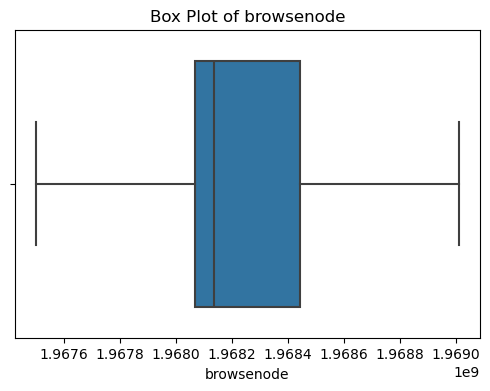

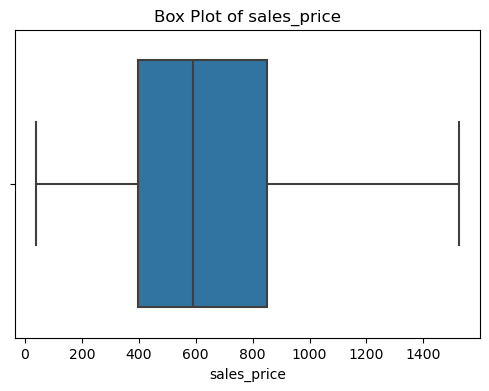

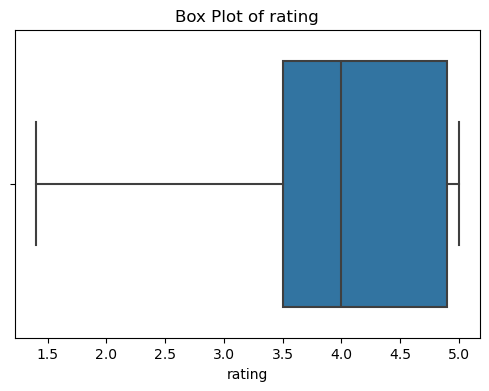

In [11]:
# Visualization: Box Plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Box Plot of {col}")
    plt.show()

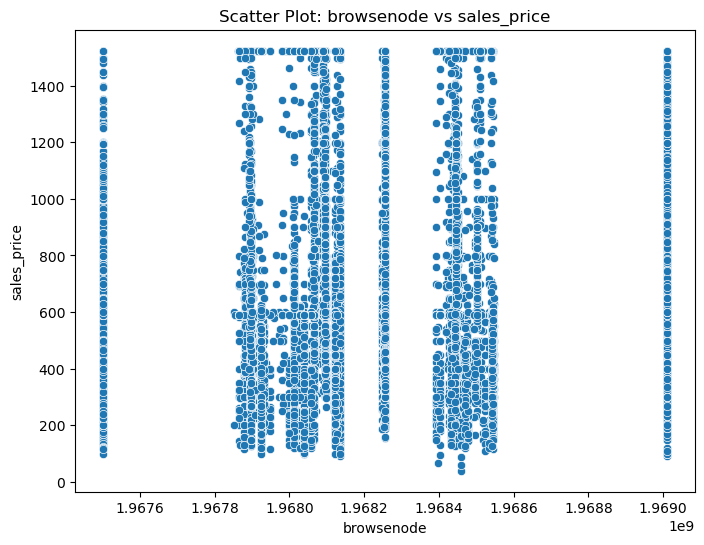

In [13]:
# Visualization: Scatter Plots
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()

In [23]:
# Ensure positive values for log transformation
if (df[log_col] >= 0).all():
    df[f"log_{log_col}"] = np.log1p(df[log_col])
else:
    print(f"Skipping log transformation for {log_col}, contains negative values.")



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


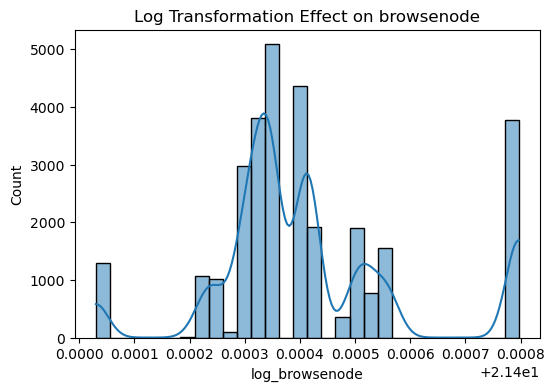

In [25]:
# Visualize Log Transformation Effect
plt.figure(figsize=(6, 4))
sns.histplot(df[f"log_{log_col}"], kde=True, bins=30)
plt.title(f"Log Transformation Effect on {log_col}")
plt.show()

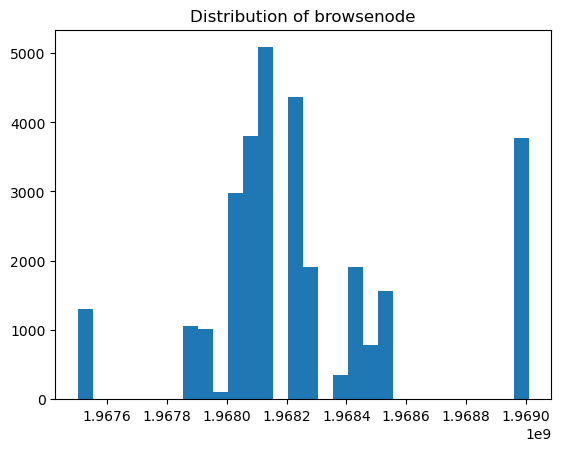

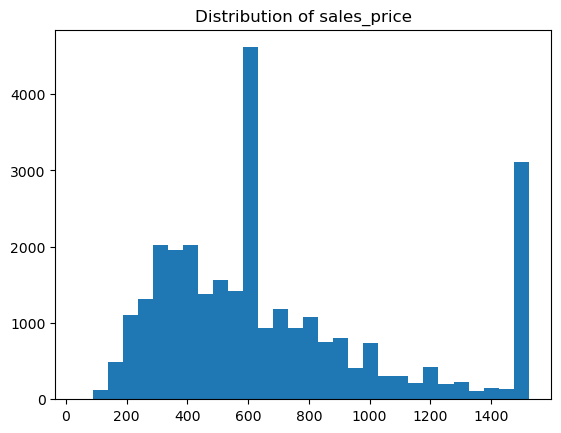

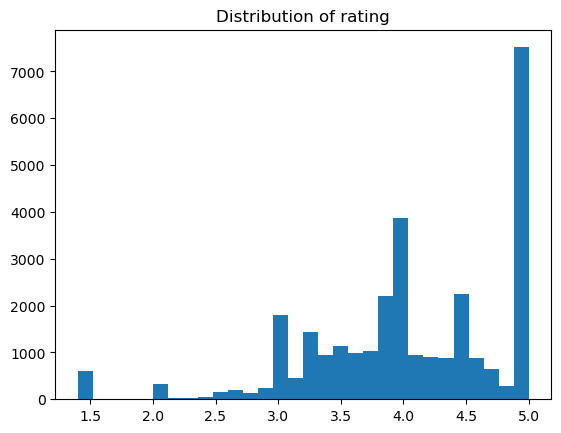

In [29]:
#Use histograms or box plots to understand data distributions
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [31]:
# Removing columns with more than 50% null values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


In [33]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df = df[(zscore(df[numeric_cols]) < 3).all(axis=1)]

In [37]:
print(df.columns)  # List all columns in the DataFrame


Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'log_browsenode', 'boxcox_browsenode',
       'boxcox_sales_price', 'boxcox_rating'],
      dtype='object')


In [39]:
print(df['product_name'].head())  # Preview the first few rows
print(df['product_name'].isnull().sum())  # Count missing values
print(df['product_name'].value_counts())  # Check value distribution


Series([], Name: product_name, dtype: object)
0
Series([], Name: count, dtype: int64)


Dataset loaded successfully!
                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-... 

<Figure size 1200x600 with 0 Axes>

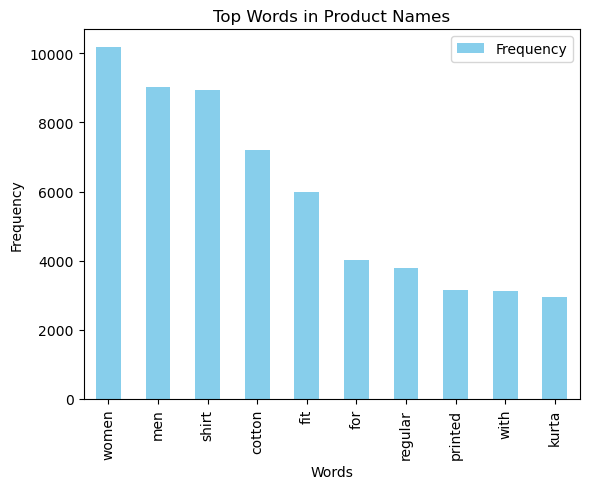

In [47]:
#Bag of words....

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'C:/Users/ADMIN/Downloads/fashion_product_data.ldjson'
try:
    # Reading the ldjson file
    df = pd.read_json(file_path, lines=True)
    print("Dataset loaded successfully!")
    print(df.head())  # Display the first few rows to understand the structure
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Step 2: Inspect and preprocess the data
# Assuming the column of interest is 'product_name' (adjust if necessary)
if 'product_name' in df.columns: # ensure that the product name exits in the dataset
    df['product_name'] = df['product_name'].astype(str).str.lower().str.strip()  #  Convert the product_name to string and Convert to lowercase and strip spaces
    df = df.dropna(subset=['product_name'])  # Remove rows with missing product names
else:
    print("Column 'product_name' not found in the dataset!")
    exit()

# Step 3: Apply Bag of Words
vectorizer = CountVectorizer()  # to create a bow model , splits text into individual words and count their occurences.
bow_matrix = vectorizer.fit_transform(df['product_name'])  # creates a sparse matrix where each row represents a product name and each column represents a words .

# Step 4: Analyze and visualize
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names) # converts sparse matrix to dense matrix..

# Display the BoW matrix
print("\nBag of Words Representation (First 10 Rows):")
print(bow_df.head(10))

# Calculate word frequencies
word_counts = bow_matrix.sum(axis=0)
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plotting the most common words
plt.figure(figsize=(12, 6))
word_freq_df.head(10).plot(kind='bar', x='Word', y='Frequency', color='skyblue')
plt.title("Top Words in Product Names")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [49]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_products(product_id, num_recommendations, vectors, product_names):
    """
    Recommend similar products based on Bag of Words representation.
    
    Arguments:
    - product_id: The index of the product in the dataset.
    - num_recommendations: Number of similar products to recommend.
    - vectors: The BoW matrix (from CountVectorizer).
    - product_names: List of product names corresponding to each vector.
    
    Returns:
    - List of recommended product names with similarity scores.
    """
    if product_id >= vectors.shape[0]:
        raise ValueError("Product ID is out of range!")

    # Compute cosine similarity
    similarity_scores = cosine_similarity(vectors[product_id], vectors).flatten()

    # Get top N recommendations (excluding the product itself)
    similar_indices = np.argsort(similarity_scores)[::-1]  # Sort in descending order
    similar_indices = [i for i in similar_indices if i != product_id]  # Exclude the product itself
    top_indices = similar_indices[:num_recommendations]

    # Create a list of recommended products
    recommendations = [(product_names[i], similarity_scores[i]) for i in top_indices]

    return recommendations

# Example usage:

# Assuming 'df' contains the product names and 'bow_matrix' is the BoW matrix
product_id = 5  # Replace with the desired product index
num_recommendations = 5  # Number of recommendations
product_names = df['product_name'].tolist()  # List of product names

# Call the function
recommendations = recommend_products(product_id, num_recommendations, bow_matrix, product_names)

# Display the recommendations
print(f"Recommendations for product '{product_names[product_id]}':")
for i, (name, score) in enumerate(recommendations, 1):
    print(f"{i}. {name} (Similarity: {score:.2f})")


Recommendations for product 'forest club | gym wear | sports shorts| shorts for men | smooth breathable fabric | shorts with pocket zippers | all time wear |':
1. easy 2 wear men's shorts (Similarity: 0.58)
2. mark louiis soft cotton shorts for men for regular wear, gym wear, running and night wear with 2 zipper and 1 back pocket. (Similarity: 0.52)
3. ezee sleeves men's cotton shorts combo (set of 3) shorts for gyming/jogging/running/exercise/cycling | shorts for men | cotton shorts for men. (Similarity: 0.50)
4. fitinc n.s lycra gym shorts for men with both side safety zippered pockets, elastic waistband & adjustable drawstrings - fitness shorts for workout and casual wear (Similarity: 0.48)
5. reebok men's shorts (Similarity: 0.44)


In [55]:
import pandas as pd

# Try loading the dataset with lines=True for JSON Lines format
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Check the first few rows of the dataframe to ensure it's loaded properly
print(df.head())


                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Pat

In [57]:

#using TF-IDF

#Converts textual data into numerical form using the TF-IDF method , which weighs terms based on their frequency and importance ...
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity   # measures similarity between vectors ranging -1 to 1.

# Load the dataset (assuming it's in the correct format now)
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Use the 'product_name' column or other relevant column as input for the recommendation system
# Here, we'll use the 'product_name' column for TF-IDF processing
product_names = df['product_name'].fillna('').tolist()  # Replace missing values with empty strings    tolist() - converts the column into a python list for easier processing.

# Initialize TfidfVectorizer and fit_transform the 'product_name' text data
vectorizer = TfidfVectorizer(stop_words='english')    # removes comman english words ...
tfidf_matrix = vectorizer.fit_transform(product_names)  # converts into TF-IDF matrix 

# Function to get recommendations for a specific product ID
def recommend_products_tfidf(product_id, num_recommendations=5):
    # Calculate cosine similarity between the target product and all other products
    cosine_similarities = cosine_similarity(tfidf_matrix[product_id], tfidf_matrix).flatten()  #computes similarity between target product and other products
    
    # Get the indices of the most similar products, excluding the target product
    similar_indices = cosine_similarities.argsort()[-(num_recommendations + 1):-1][::-1]
    
    # Return the product names of the most similar products
    return df['product_name'].iloc[similar_indices].tolist()

# Example usage:
product_id = 10  # Example product ID (you can change this as needed)
num_recommendations = 5  # Number of recommendations to generate

# Get recommendations for the specified product ID
recommended_products = recommend_products_tfidf(product_id, num_recommendations)

# Print the recommendations
print(f"Recommendations for product '{df['product_name'].iloc[product_id]}':")
for i, product in enumerate(recommended_products, 1):
    print(f"{i}. {product}")


Recommendations for product 'Toddler Little Boy Straight Outta Timeout Long Sleeve T-Shirt (2T, Black)':
1. Waldeal Boys Girls Straight Outta Timeout Toddler T Shirt Funny Out of Timeout Tee 5 6
2. carter's Little Boys' Graphic Tee (Toddler/Kid)
3. Marvel Boy's Regular fit Long Sleeve Top
4. RuggedButts Little Boys Pre-tied Bow Tie/Bowtie - Green - 2T-4T
5. Toddler Infant Baby Boys Stripe Soft Cotton Crew Dress Socks Non-Skid, 1-2T, (6-Pack)


In [8]:
import pandas as pd

# Try loading the dataset with lines=True for JSON Lines format
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Check the first few rows of the dataframe to ensure it's loaded properly
print(df.head())

                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Pat

In [14]:
#Bag of Words 

import numpy as np  # for numerical computation...
from sklearn.metrics.pairwise import cosine_similarity  # measures similarity between vectors ranging -1 to 1.
import pandas as pd
from IPython.display import Image, display  # For displaying images in Jupyter Notebook

# Load the dataset
file_path = 'C:/Users/ADMIN/Downloads/fashion_product_data.ldjson'  # Replace with your file path
df = pd.read_json(file_path, lines=True)  # Use lines=True for JSON lines format

# Load pre-trained GloVe vectors
def load_glove_vectors(glove_file):
    glove_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()  # removes extra whitespaces and splits 
            word = values[0]
            vector = np.array(values[1:], dtype='float32') # converts the remaining components into numpy array..
            glove_dict[word] = vector
    return glove_dict

# Convert product name to its vector representation using GloVe embeddings
def get_product_vector(product_name, glove_dict):
    words = product_name.split()
    vectors = [glove_dict.get(word, np.zeros(50)) for word in words]  # Default to zero vector if word not found
    return np.mean(vectors, axis=0)  # Average of word vectors

# Example usage:
product_names = df['product_name'].tolist()  # List of product names
product_images = df['image_urls__small'].tolist()  # List of product image URLs (use appropriate column)

# Displaying the products and their images
for i, (name, img_url) in enumerate(zip(product_names, product_images)):
    print(f"Product {i+1}: {name}")
    display(Image(url=img_url))  # Display the image of the product


Product 1: LA' Facon Cotton Kalamkari Handblock Saree Blouse Fabric 100 cms Black Base Dancers (Cotton)


Product 2: Sf Jeans By Pantaloons Men's Plain Slim fit T-Shirt


Product 3: LOVISTA Cotton Gota Patti Tassel Traditional Printed Kurti with Pant,Angrakha Salwar Suit


Product 4: People Men's Printed Regular fit T-Shirt


Product 5: Monte Carlo Grey Solid Cotton Blend Polo Collar Tracksuit


Product 6: Forest Club | Gym Wear | Sports Shorts| Shorts for Men | Smooth Breathable Fabric | Shorts with Pocket Zippers | All TIME WEAR |


Product 7: PrintOctopus Graphic Printed T-Shirt for Men Chill T-Shirt | Hindi Quote T-Shirt | Half Sleeve T-Shirt for Women | Round Neck T Shirt | 100% Cotton T-Shirt | Short Sleeve T Shirt


Product 8: Pepe Jeans Men's Solid Regular fit Casual Shirt


Product 9: Carahere Boys Handmade Pre-Tied Classic Polka Dot Bow Ties M132 Navy Blue


Product 10: Peppermint Synthetic Dress


Product 11: Toddler Little Boy Straight Outta Timeout Long Sleeve T-Shirt (2T, Black)


Product 12: Puma Unisex Tribal Regular Fit T-Shirt


Product 13: Jevi Prints Women's Cotton Printed Straight Kurta (PRJ-617)


Product 14: OLLI Men's Orange, Lex Purple, White Cotton Brief Innerwear (Pack of 3)


Product 15: Pinkmint Women's Multi-Coloured Digital Print Crepe Kurti


Product 16: Miss Chase Women's Solid Shoulder Cut-Out Half-Sleeve Round Neck Mini Dresses


Product 17: bebe Women Genuine Leather Slim Belt


Product 18: Colt by Unlimited Men's T-Shirt


Product 19: Pepe Jeans Women's Solid T-Shirt


Product 20: C9 Women Turquoise Active T-Shirt


Product 21: PuJoy Women's Soft Cotton Traditional Bengali Handloom Jharna Design Tant Saree with Blouse Piece …


Product 22: Winza Designer Chiffon Saree with Blouse Piece


Product 23: kalpit creations Men's Comfort Soft Cotton Black Plain Polo Collar Half Sleeve T-Shirt with Solid Color


Product 24: Pooplu Mens Ajay Cotton Printed Round Neck Half Sleeves Black & White T.Shirt. Common Names, Symbol Tshirts


Product 25: JORKK Men's Cotton Polo Neck T-Shirt.


Product 26: nauti nati Girls' Midi Dress


Product 27: 7 ate 9 Apparel Kids Fifth Birthday Unicorn T-Shirt 2T


Product 28: Patangaa Ethnic Digital Printed Multicolored Readymade Women's Kurti


Product 29: 3Pcs/Set Kids Baby Girls Dot Wrapped Tops + Big Hole Denim Jeans Pants + Headband Outfits Clothing Set


Product 30: GOLDSTROMS Minelli Women Round Neck Rayon Fabric Nursing/Feeding/Maternity Gown


Product 31: Calvin Klein Jeans Men's Plain Slim fit Casual Shirt (40I8055100_Standard White_XL)


Product 32: Pari Singh Orange Plain Women's Frok


Product 33: ChicNChic Toddler Baby Girls Summer Clothes Whale Print Top with Plaid Shorts Outfits Set (7T, Pink)


Product 34: TEXCO Pink Side Draw Strings Crop Top


Product 35: DHRUVI TRENDZ Women's Soft Cotton Plain Saree with Blouse Piece Material


Product 36: Colt Boy's Pyjama Set


Product 37: bluehaaat Balidan Dena Hoga Sacred Games Quote Printed Cotton Tshirt for Men


Product 38: Magson Neo Men's Assorted Tie (2018 collection)


Product 39: Arrow Newyork Men's Checkered Slim Fit Formal Shirt


Product 40: Tommy Hilfiger Men's Checkered Regular fit Casual Shirt


Product 41: Vetrokart Women's Tappeta Silk Semi-stitched Lehenga Choli (Blue, Free Size)


Product 42: ONLY Women Casual Dress


Product 43: Rangeelo rajasthan Women's Straight Kurta


Product 44: Pepe Jeans Girl's Plain Regular fit T-Shirt


Product 45: Peter England Men's Slim fit Formal Shirt


Product 46: LEADING LADY Women's Full Cup Non Padded Non Wired Bra (Pack of 2)


Product 47: RIGO Men's Striped Slim Fit T-Shirt


Product 48: Miss Chase Women's Pink Self Design Bardot Neck Half Sleeved Off Shoulder Ruffled Top


Product 49: EDGEMETER Navy Blue Round Neck Half Sleeves Solid Plane t-Shirt


Product 50: SWORNOF Women's Silk Saree With Blouse Piece (Blue)


Product 51: People Women's Regular Fit Top


Product 52: GURUS FOREVER RAYON PLAZZO XXL TO 5XL


Product 53: Aurelia Women's Straight Kurta


Product 54: arars Women's Kanchipuram Kanjivaram Pattu style crepe butta silk saree with Blouse, Saree Colour: (267)


Product 55: Hot Wheels Boys' T-Shirt (HWPBSL0893_Grey_4-5 Years)


Product 56: Van Heusen Men's Slim fit Formal Shirt


Product 57: Rupa Thermocot Women's Plain/Solid Synthetic Thermal Bottom


Product 58: Aai Shree Khodiyar Art Georgette Saree


Product 59: The Children's Place Boys' Big Fleece Sherpa Sweater


Product 60: Women's Chicken Embellished/Embroidery Kurta -(Medium) Red


Product 61: Simplicity Patterns Creative Patterns Uv5124Os Shorts Or Pants, One Size


Product 62: Lincy fashion women's anarkli gown (Semi-Stitched Gown_Free Size)


Product 63: Max Men's Regular fit T-Shirt


Product 64: Claura Floral Printed Red Color Cotton Nighty With Robe Or Nightdress


Product 65: CAVALLO by Linen Club: Red Checked Casual Linen Shirt for Men


Product 66: Roden Men's Solid Full Sleeve Tshirt


Product 67: SEALINF Womens Top Handle Leather Shoulder Bag Convertible Backpack with Front Flap (brown)


Product 68: Vinay's Women's Cotton Straight Kurta


Product 69: Stormborn Men's Printed Regular Fit T-Shirt


Product 70: VIP Frenchie Pro Cotton Briefs - Assorted Pack of 3 (Colors May Vary)


Product 71: NYFASHION101 Boys& Solid Color Adjustable Pre-Tied Bow Ties


Product 72: Usi universal Razor Black, Red and White Shorts


Product 73: Fruit of the Loom Men's Brief


Product 74: Stacy Adams Men's Plus-Size 30 MM Pinseal Leather Belt with Brushed Nickel Buckle, Chocolate, 52


Product 75: Hudson Baby First Birthday Outfit, 4 Piece


Product 76: SCH Regular Fit Women's Cotton Rayon Casual Palazzo


Product 77: Hangout Hub Cotton Mens Tshirts Shiva Tilak Printed for Brothers/Sibiling/Family/Friends


Product 78: Peter England Men's Regular fit Formal Shirt


Product 79: Summer T-Shirts Blue Orange Green and Peach for Girl and Boy (Pack of 4)


Product 80: Aarika Cotton a-line Dress


Product 81: Excalibur by Unlimited Men's Solid Regular Fit Formal Shirt (Pack of 2)(Colors & Print May Vary)


Product 82: Athflex Flex-Fit Fitness Gym Stringer Vest, Tank Top, Racer Back, Gym Vest, Men's Vest, Bodybuilding Stringer Vest


Product 83: C.Cozami Women's Long Sleeves Casual White/Black/Red Checkered Shirt


Product 84: Linkin Park by Free Authority Men's Regular fit T-Shirt


Product 85: Forever Men Braided Casual Pure Leather Belt with Imported pin Buckle with belts for Boy casual stylish width 38mm color Blue New collection leather belt for men formal branded,Free Size upto 44 inch


Product 86: Silly Punter Punisher One Batch Two Batch Men's Cotton T-Shirt


Product 87: Roden Mens Colorblock Cotton Vest


Product 88: Indigo Women's A-Line Kurti


Product 89: Peter England Men's Printed Slim Fit Formal Shirt


Product 90: BIBA Women's Straight Kurta


Product 91: Red Eye black suspender with bow for kids


Product 92: Loviena Gypsy Men's Tie


Product 93: LOPA CORAL-PINK FOIL PRINTED & EMBROIDERED RAYON STRAIGHT FIT KURTA AND PRINTED PALAZZO


Product 94: Enchanted Drapes Womens' Blue Red Cheque Crepe Kurti [Size: M] {EDK0193}


Product 95: Aurelia Women's Cotton A-Line Kurta


Product 96: Levi's Women Sweater


Product 97: KEOTI Dailywear Comfort Fit Nighty Gown Pack - Pack of 2


Product 98: BIBA Women's Straight Kurta


Product 99: Forever9teen Women's Hosiery Maxi Dress_3SS16-1060/NS1-P


Product 100: Digital Print Pattern Regular Fit C-Cut Kurti With Plazo


Product 101: Max Boy's Regular Fit T-Shirt


Product 102: WonderWink Women's Wonderwork Women's V-Neck Scrub Top


Product 103: Park Avenue Solid Cotton Medium Red Super Slim Fit Narrow Collar Full Sleeve Shirt


Product 104: IRYA Red Designer Palazzo Free Size


Product 105: Park Avenue Violet Cotton Silm Fit Shirt


Product 106: Chromozome Men's Striped Brief


Product 107: ONLY Women's Plain Regular Fit Top


Product 108: Masha Women's Cotton-Bikini/Hipster panty-Valupack-3pcs


Product 109: TOMMY HILFIGER Girls' Dress


Product 110: Premium Summer Mesh Golf Ivy Driver Cabby Newsboy Cap Hat


Product 111: Neostreak Men's Slim Fit Stretchable Jeans


Product 112: HUETRAP Men's Om Printed T Shirt


Product 113: Alena Cotton Women casual wear kurta in Beige Colour Size


Product 114: Child Cottage Banarasi Silk Saree


Product 115: Faux Leather Belt with Nickel Buckle - Tan 44


Product 116: Coco Reef Women's Master Classic The Five Way Tankini


Product 117: Mimosa Art Chiffon saree Kanjivarm Pattu style With Running Blouse Color: Green (4313-2280-SD-OLV)


Product 118: Puma Men Style Athletics Tee Red Dahlia Heather


Product 119: Chalk By Pantaloons Boys' Sweater


Product 120: Jaipur Kurti Women's Straight Kurta


Product 121: Dollar Bigboss Men's Cotton Vest (8902889301228_MDVE-02-BB-DERBY-WHITE_85_White)


Product 122: Paramount Hand Embroiderey Chikan Kurti for Women


Product 123: ALC Creations Women's Faux Crepe Straight Kurti


Product 124: 612 League Boys' Shirt


Product 125: global desi Synthetic a-line Dress


Product 126: Drapes Women's Cotton Printed Unstitched Dress Material (Black)


Product 127: United Colors of Benetton Men's Baseball Cap


Product 128: Funbase Children Outdoor Sports Star Shaped Bling Baseball Hiking Cap Pink


Product 129: John Miller Men's Checkered Slim Fit Synthetic Formal Shirt


Product 130: Varkala Silk Sarees Women's Banarasi Soft Cotton Silk Saree (V161RNNB-SM_Magenta & Navy Blue_Free Size)


Product 131: ABOF Women Sweatshirt


Product 132: Sofra Women's Cotton Ribbed Tank Top


Product 133: Levi's Men's Printed Regular Fit Casual Shirt


Product 134: McHenry Men's Regular Fit Poly Viscose Checkered Formal Trousers


Product 135: MATCH MUCH Satin Skinny Neckties -6 Different Styles(Music Notes)


Product 136: Gini & Jony Boys' Starred Regular Fit Shirt


Product 137: GOWRI MARKETING Girls' Dress


Product 138: Jevi Prints Women's Unstitched Cotton Blue Chevron Printed Kurti Fabric (Fabric only for Top) (S-1604)


Product 139: Rupa Jon Men's Plain Vest (Pack of 3)


Product 140: Aurelia Women's cotton straight Kurta


Product 141: E4hats California Embroidered Washed Cap - Black OSFM


Product 142: Royal Men's Silk Blend Dhoti & Kurta Set_Purple


Product 143: Urban Ranger by Pantaloons Men's Plain Slim Fit Casual Shirt


Product 144: Luke and Lilly Girl's Cotton Half Sleeve Tshirt - Pack of 6


Product 145: bioworld Men's Star Wars Rogue One Sublimated Bill Snapback Cap


Product 146: BSTORIES Women's Viscose Morocco Cullout Lounge Shorts


Product 147: J2J Men's Red Cotton Vest Casual Sleeveless Inner Wear


Product 148: LADY CHOICE Women's Sports Bra Combo Pack of 6


Product 149: Rangriti Women's Asymmetric Kurta


Product 150: JAIPUR ATTIRE Women's Cotton Flared Kurti


Product 151: Lusiyu Girl Solid Child Size Wrist Length Formal Glove with Bow (White)


Product 152: Next Look Men's Solid Slim Fit Formal Shirt


Product 153: Bronz by Unlimited Women's Slim fit Shirt


Product 154: Sikander -Men's|Women's Black Soft Warm Cozy Fully Stretchable Faux Fur Velvet Socks Without Thumb (Pack of 1)


Product 155: Jersey Hood | Liverpool Home & GK Jersey/Shorts for Mens/Boys | 2019-20 | Polyester Dri-Fit Unbranded |


Product 156: Quiksilver Men's Clip Charger Trucker Hat


Product 157: dongli Boys Marvellous T Shirt (Pack of 3)


Product 158: Fabclub Women's Cambric Cotton Floral Printed Straight Kurti


Product 159: Campus Sutra Men's Plain Regular fit T-Shirt


Product 160: Flairs New York Gentlemans Essentials Bow Tie and Pocket Square Matching Set (Peacock Green [Glitter Dot Print])


Product 161: ADRO Men's GOT Printed Cotton T-Shirt


Product 162: Mens Solid Formal Banded Pre-tied Bow Ties (Pink)


Product 163: Adjustable White Adult Ice Cream Cone Embroidered Visor Dad Hat


Product 164: US Polo Association Men's Formal Shirt


Product 165: Greenery Thicken Fleece Balaclava Hat Hood Double Layers Police Swat Ski Bike Wind Proof Mask Winter Outdoors Warm Caps Neck Warmer (ARMY GREEN)


Product 166: Kidofash Pack of 2 Pair Antislip Socks Antiskid Socks cum Booties for Kids (6 Months to 2 Years Old)


Product 167: Magic Collections Girls Birthday Dress Gown_M C_888


Product 168: Bronz Women's Plain Slim fit Shirt


Product 169: US Polo Men's Solid Regular Fit Casual Shirt


Product 170: GRITSTONES Men's Multi Army Print Vest GSVST720


Product 171: Sisjuly Sisjuly Rhinestone Crystal Sash Wedding Belt For Prom Party Evening Dresses


Product 172: bilAnca Premium Quality Women's Girl's Ladies Cotton Velvet Finish Casual Belt Stylish Trendy Buckle Strap Ideal for Jeans Trousers Cargo Joggers | 2 CMS (0.75") Wide | 41" Long | Waist Upto 36"


Product 173: Smit Enterprise Kachhi Bandhani Cotton Silk Unstitched Dress Material For Women


Product 174: AD & AV Men's Formal Trouser (298_Linen_Cream_AA_30, Grey, 30)


Product 175: HELG Mens Formal Cotton Plain Mandarin Chinese Collar Half Sleeves Comfort Fit Shirt


Product 176: Inkholic Men's Cricket Sports Jersey IN701


Product 177: Lole Women's Caribbean Bottom


Product 178: Ruggers Men's Striped Regular fit T-Shirt


Product 179: Mehrunnisa BAGRU MAHESHWARI Cotton Silk Saree With Blouse Piece From Jaipur


Product 180: pietra Combo Plain Patiala Salwar and Dhoti for Women


Product 181: BIBA Women's Cotton Straight Kurta


Product 182: ONN Men's Cotton Vest


Product 183: New Ethical Fashion Crepe Fully Stiched Womens Top


Product 184: Max Girl's Regular Fit T-Shirt


Product 185: Captain America By Kidsville Boy's Plain Regular fit T-Shirt


Product 186: Aarika Silk a-line Dress


Product 187: M.Weft Men's Trendy Blue Jeans _36


Product 188: Printoctopus Women'S Green T-Shirts


Product 189: SKULT by Shahid Kapoor Men's Varsity Jacket


Product 190: Atharv Collection Women's Unstitched Cotton Salwar Suit Dress Material With Nazneen Printed Dupatta (Brown; Free Size)


Product 191: Navabi Export Women's Wrap Kurta(VF-KU-125 XXXL _Grey_XXX-Large)


Product 192: High Point Little Girls' My Little Pony Knee High Socks- Blue/Pink (Pack of 2)


Product 193: KURTA DHOTHI with KHANDWA


Product 194: McHenry Mens Pure Cotton Regular Fit Checkered Casual Full Sleeves Shirt


Product 195: Romano Women's Rain Skirt and Rain Jacket


Product 196: American Noti White Jeans Men | White Denim Jeans for Men | White Cotton Jeans for Men | Jeans for Men Slim fit Stretchable Pure White | Jeans White for Men


Product 197: SHOPMOZO Unisex Pure Cotton Checkered Short Sleeve Night Suit for Boys and Girls Full Pyjama with Short Top Combo Set (SM-00515UNISEXSWPS Multicolor)


Product 198: ultrasav Women's Net Embroidered Semi-Stitched Lehenga Choli (Fanta_001, Orange, Free Size)


Product 199: My Lil Princess Baby Girls Birthday Frock Dress_Pink Beeds_Net Fabric_3-9 Years


Product 200: GURU KRIPA BABY PRODUCTS Born Baby Zero Kids Inner Wear Baniyan Baby Vest Zero Unisex 100% Cotton White


Product 201: Mizago Women's Casual Sleeveless Solid,Frill Front Design Women's Shirt


Product 202: Zacharias Unisex Hip Hop Cap zach-hip-hop-Black-cap,


Product 203: Max Boy's Regular fit T-Shirt


Product 204: ATTIRE FASHIONS Womens Rayon Embroidered and Festival Kurta Full Stitched


Product 205: W for Woman Women's Straight Kurta


Product 206: ARJUBAN Women's Rayon Empire Kurta


Product 207: Korea Veteran 3D Embroidered Sandwich Bill Military Baseball Cap (One Size


Product 208: Luvable Friends Girls' 24-Piece Gift Cube


Product 209: Macroman M-Series Men's Cotton Vest


Product 210: Parx Men's Printed Regular Fit T-Shirt


Product 211: Neu Look Printed T-Shirt for Women | Plain T-Shirt | Half Sleeve T-Shirt | Round Neck T Shirt | 100% Cotton T-Shirt | Short Sleeve T Shirt


Product 212: WHOLESOME DEAL men's navy blue black and maroon microfiber tie pack of three(wsdtie11)


Product 213: Bobcat 250023 Black One Size Cap (Value Silver Tipping)


Product 214: Indian Handicraft Standards Women Cotton Kashmiri Kurti.


Product 215: Claura Women's Satin Pack of 6pc Night Dress {1 NIGHTY+1 ROBE+1TOP+1 CAPRI+1 SPAGHETTI TOP+1 SHORT SKIRT} (Pink)


Product 216: IndusDiva Straight Cut Printed Kurta with Threadwork


Product 217: Malati Bastrabitan Stylish Yellow Pure Handloom Khadi Saree, comfortable & very soft with Pom Pom for Women


Product 218: Indistar Boys Wollen Warm High Neck Full Sleeves T-Shirt/Inner/Skivvy for Winter (Pack of 2)


Product 219: Stripe Dress for Girls : Princess Bow Skirt by PuppetBox


Product 220: ChamproLeather Baseball Belt


Product 221: Sukhvilas Fashion Women's Cotton Off White Printed Straight Kurti (SV-KU-225_$P)


Product 222: Lovable Women Girls Cotton Padded Non Wired Full Coverage Everyday Bra in Multicolor- L3516 - BK - CP


Product 223: Allen Solly Men's Slim fit Casual Shirt


Product 224: ADA Lucknow Chikan Needlecraft Regular Wear Faux Georgette Short Top A211921


Product 225: Adjustable Navy Adult California Republic Bear Embroidered Deluxe Dad Hat


Product 226: Arihant Men's Checkered 100% Cotton Half Sleeves Regular Fit Formal Shirt


Product 227: INDIBELLE Women's Rayon Straight Kurta


Product 228: Max Women's Rayon a-line Kurta


Product 229: Van Heusen Men's Printed Slim fit Formal Shirt


Product 230: SKULT by Shahid Kapoor Men's Plain Athleisure, White, Slim Fit T-Shirt with Thumbhole and Crew Neck for Workout/Casual/Semi-Formal Occasions


Product 231: 3Pcs Baby Girls Headband + Top T-Shirt + Jeans Set Kids Clothes Outfits (3T Multicoloured)


Product 232: Jevi Prints Women's Cotton Printed Straight Kurta/Kurti (SH-1709)


Product 233: Peter England Men'


Product 234: SKULT by Shahid Kapoor Men's Solid Regular Fit T-Shirt


Product 235: TANJOtweet Women's Cambric Cotton Floral Kurti (Pink, Small)


Product 236: PROTEENS Bodycare Mickey Printed Boys Blue Striped Night Suit


Product 237: Mickey & Friends Boys' T-Shirt


Product 238: Kids Headquarters Baby Girls Tunic Set-Capsleeves, White/Blue/Yellow, 12M


Product 239: DAP3E01 Various Solid Microfiber Pre-tied Bowtie and Knit Skinny Tie Set By Dan Smith


Product 240: AHALYAA Women's Crepe Straight Kurti (Magneta)


Product 241: W for Woman Straight Kurta


Product 242: Singhal Fashion Men's Sleeveless Jute Hunting Jacket


Product 243: VERO MODA Women's Crop T-Shirt


Product 244: NEFF Women's Sarah Textured and Embroidered Beanie


Product 245: 9teenAGAIN Women's Cotton Checkered Nighty (Brown)


Product 246: Excalibur by Unlimited Men's Solid Regular Fit Formal Shirt (Pack of 2)(Colors & Print May Vary)


Product 247: W for Woman Straight Kurta


Product 248: Puma Men's Regular fit T-Shirt


Product 249: Lee Men's Modern Series Relaxed Fit Bootcut Jean


Product 250: What The Duck? Black Printed T-Shirt


Product 251: Mohrupi Women's Cotton Flex ikkat Floral Printed Kurta


Product 252: Royal Export Women's Net Floor length Readymade Gown


Product 253: TEXCO Winter Cotton Polyster Fleece Hooded Jacket


Product 254: Parx Grey Slim Fit Cotton Blend Casual Shirt


Product 255: United Colors of Benetton Baby Girls' Regular Fit Clothing Set


Product 256: Indian Virasat Peach Colored Cotton Printed Tunic


Product 257: Alfa Quilted Off White/Grey Winter wear Cotton Thermal Set (Top + Pyjama) for Men + 1 Pair Socks Free


Product 258: Van Heusen Woman Women Pullover


Product 259: Weavers Villa Women's Shawl


Product 260: Janasya Women's Rayon Printed Straight Kurta


Product 261: Mothercare Baby Boys' Knitwear


Product 262: United Colors of Benetton Baby Girl's Regular fit Trousers


Product 263: Oneliner Men's Cotton Full Sleeve T-Shirts-(OLMT20-$P)


Product 264: Khadi Vastra Men Solid Full Sleeve Cotton Formal Spread Shirt - Pack of 2


Product 265: Dixcy Scott UNO Men's Cotton Vest (Assorted, Medium/80-85 Cm) - Pack of 2


Product 266: BYC Men's Solid Curved Hem Round Neck Full Sleeve Tshirt/Tshirt for Mens/Round Neck Tshirt/Sports Trim Tshirt/Hip Hop Tshirt


Product 267: Kalt Men's Full Sleeves Cotton Blend Mandarin Collar T-Shirt (TM0644 Teal)


Product 268: Arrow New York Men's Formal Shirt


Product 269: Stylee Lifestyle Green Cotton Printed Dress Material


Product 270: Superman By Kidsville Boy's Plain Regular fit T-Shirt


Product 271: RAJMANDIRFABRICS Women's Cotton A-Line Kurti


Product 272: Indiweaves Women's Velvet Churidar Embossed Leggings_Green_Free Size_71542


Product 273: Nihaan Impex Cotton Straight Kurti for Women and Girls Red


Product 274: Gubbarey Boys Kurta Pyjama


Product 275: Zeeya Fashion Women's Chanderi Straight Unstitched Salwar Kameez (ZF-40001, Sky Blue, Free Size)


Product 276: Art Décor Cotton Silk Broad Bordered Pack of 2 Sarees- Combo of 2 (DP Green & Pink Blue)


Product 277: Max Women's Regular Fit Shirt


Product 278: Karigari Women's Rayon A-Line Kurta


Product 279: Amazon Brand - Symbol Women's T-Shirt


Product 280: hhichkki Cold Shoulder Solid Women Green top


Product 281: Flying Machine Men's Plain Slim Fit T-Shirt


Product 282: Arihant Checkered 100% Cotton Half Sleeve Regular Fit Formal Shirt for Men


Product 283: One Size White Adult Avocado Embroidered Bucket Cap Dad Hat


Product 284: Safana Cotton a-line Dress


Product 285: PINKY PARI SCREEN PRINTED RAYON BLUE STRAIGHT FESTIVE KURTA WITH PRINTED RAYON PALAZZO


Product 286: blackberrys Men's Solid Slim Fit Casual Shirt


Product 287: KRONOS Men's | Round Neck T-Shirt | 100% Polyester | Quick-Dry | Sports T-Shirt


Product 288: Yash Gallery Women's Cotton Angrakha Kurta


Product 289: W for Women's Straight Kurta


Product 290: United Colors of Benetton Girls' Dress


Product 291: US Polo Association Men's Regular fit T-Shirt


Product 292: Marks & Spencer Men's Regular fit Formal Shirt (Pack of 3)


Product 293: Amazon Brand - Solimo Water Resistant Polyester Long Rain Coat, Blue, XX Large


Product 294: Jockey Men's Cotton Zone (8901326099520_US31_XL_Navy and Grey Melange)


Product 295: Mothercare Girls' Tribal Regular Fit T-Shirt


Product 296: Amazon Brand - Myx Women's Cotton a-line Kurti


Product 297: USPA Boy's Striped Regular Fit Shirt


Product 298: Double-layer Heavy-duty Polar Fleece Winter Balaclava Hood (Army Green)


Product 299: Si rosa by Hopscotch Girls Poly Viscose Charming Embroidered Full Length Party Dress in Pink Color for Ages 5-6 Years


Product 300: ZEYO Women's Cotton Green & Peach Stripe Print Short Nighty


Product 301: W for Woman Women's Straight Kurta


Product 302: Baluchi Bob Minion Graphic Tee


Product 303: Raymond Men's Formal Shirt


Product 304: JOKL® Women's Net Embroidered anarkali Semi Stitched Long Gown With Duptta


Product 305: Amazon Brand - Myx Women's A-Line Kurti


Product 306: Dopp Mens Tahoe Leather Casual Belt


Product 307: Playboy Men's Solid Brief (Packof 2)


Product 308: Red Eye Men's Check Print Necktie, Pocket Square, Cufflinks (Red)


Product 309: Lgc Women'S Rust Bronze Jumpsuits


Product 310: Jockey Men's Cotton Vest (Pack of 4) (8901326061992_8816-0210-WHITE White 85)


Product 311: Manash Fashion Women Denim Dungaree Ice Blue


Product 312: Puma Men's V-Neck Cotton T-Shirt


Product 313: Pokmon Ash Ketchum Embroidered Unisex-adult Hat Cap -One-size Red/white


Product 314: Deruicent Fishing Hat Folding Sun Hat 360 UV Protection Adjust Cap for Men Women Hiking Fishing Outdoor Yard Garden Working (Grey)


Product 315: Blacksmith Men's Combo of Necktie, Pocket Square Lapel Pin and Cufflinks(Black, Free Size) - Gift Set for Men Wedding Marriage Groom Accessories For Blazer And Suit


Product 316: Looks Akira Cotton with Blouse Piece Saree (LA-S1396_Pink_One Size)


Product 317: Allen Solly Women's A-Line Dress


Product 318: CHINMAYA Regular fir Straight Kurti | kurties for Women (Light Green & Baby Pink) Combo Kurtis for Women


Product 319: Shut up Legs!: My Wild Ride On and Off the Bike


TypeError: expected str, bytes or os.PathLike object, not float

In [20]:
#Similarity Recommendation (TF-IDF)
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity  # measures similarity between vectors ranging -1 to 1.
from sklearn.feature_extraction.text import TfidfVectorizer # converts product_names into numerical feature vectors based on TF-IDF model...
import pandas as pd
from IPython.display import Image, display  # For displaying images in Jupyter Notebook

# Load the dataset
file_path = 'C:/Users/ADMIN/Downloads/fashion_product_data.ldjson'  # Replace with your file path
df = pd.read_json(file_path, lines=True)  # Use lines=True for JSON lines format

# Extract product names and images from the dataset
product_names = df['product_name'].tolist()  # List of product names
product_images = df['image_urls__small'].tolist()  # List of product image URLs (use appropriate column)

# Function to recommend similar products using TF-IDF and cosine similarity
def recommend_similar_products(product_id, num_recommendations, product_names, product_images):
    # Initialize TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    
    # Convert product names to TF-IDF features (vectors)
    tfidf_matrix = tfidf_vectorizer.fit_transform(product_names)
    
    # Get the TF-IDF vector of the selected product
    product_vector = tfidf_matrix[product_id]
    
    # Calculate cosine similarity between the selected product and all other products
    similarities = []
    for i in range(len(product_names)):
        if i != product_id:  # Skip the product itself
            similarity = cosine_similarity(product_vector, tfidf_matrix[i])[0][0]
            similarities.append((product_names[i], product_images[i], similarity))
    
    # Sort by similarity and get the top N recommendations
    similarities.sort(key=lambda x: x[2], reverse=True)
    recommendations = similarities[:num_recommendations]
    
    return recommendations

# Example usage:
product_id = 5  # Replace with the desired product index
num_recommendations = 5  # Number of recommendations

# Get recommendations
recommendations = recommend_similar_products(product_id, num_recommendations, product_names, product_images)

# Display the selected product
print(f"Selected product: {product_names[product_id]}")
display(Image(url=product_images[product_id]))  # Display the selected product's image

# Display the recommendations with images
print(f"\nTop {num_recommendations} recommendations:")
for i, (name, img_url, score) in enumerate(recommendations, 1):
    print(f"{i}. {name} (Similarity: {score:.2f})")
    display(Image(url=img_url))  # Display the recommended product's image


Selected product: Forest Club | Gym Wear | Sports Shorts| Shorts for Men | Smooth Breathable Fabric | Shorts with Pocket Zippers | All TIME WEAR |



Top 5 recommendations:
1. Color Club 1 Women's Sports Gym and Yoga Shorts (Similarity: 0.44)


2. EASY 2 WEAR Men's Shorts (Similarity: 0.43)


3. Max Women's Sports Shorts (Similarity: 0.40)


4. Puma Women's Sports Shorts (Similarity: 0.38)


5. MARK LOUIIS Soft Cotton Shorts for Men for Regular Wear, Gym Wear, Running and Night Wear with 2 Zipper and 1 Back Pocket. (Similarity: 0.38)


In [18]:

#TF-IDF with displaying the images...
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display  # For displaying images in Jupyter Notebook

# Load the dataset
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Use the 'product_name' column or other relevant column as input for the recommendation system
# Here, we'll use the 'product_name' column for TF-IDF processing
product_names = df['product_name'].fillna('').tolist()  # Replace missing values with empty strings
product_images = df['image_urls__small'].fillna('').tolist()  # Replace missing image URLs with empty strings

# Initialize TfidfVectorizer and fit_transform the 'product_name' text data
vectorizer = TfidfVectorizer(stop_words='english')  #ensures that common English words (e.g., "the", "is") are ignored.
tfidf_matrix = vectorizer.fit_transform(product_names) #Transforms the list of product names into a sparse matrix of TF-IDF features.

# Function to get recommendations for a specific product ID
def recommend_products_tfidf(product_id, num_recommendations=5):
    # Calculate cosine similarity between the target product and all other products
    cosine_similarities = cosine_similarity(tfidf_matrix[product_id], tfidf_matrix).flatten() 
    
    # Get the indices of the most similar products, excluding the target product
    similar_indices = cosine_similarities.argsort()[-(num_recommendations + 1):-1][::-1] #Sorts the list of products in descending order of similarity scores
    
    # Return the indices and product names of the most similar products
    return similar_indices, df['product_name'].iloc[similar_indices].tolist(), df['image_urls__small'].iloc[similar_indices].tolist()

# Example usage:
product_id = 10  # Example product ID (you can change this as needed)
num_recommendations = 5  # Number of recommendations to generate

# Get recommendations for the specified product ID
similar_indices, recommended_products, recommended_images = recommend_products_tfidf(product_id, num_recommendations)

# Print and display the recommendations with images
print(f"Recommendations for product '{df['product_name'].iloc[product_id]}':")
for i, (product_name, img_url) in enumerate(zip(recommended_products, recommended_images), 1):
    print(f"{i}. {product_name}")
    display(Image(url=img_url))  # Display the image of the recommended product


Recommendations for product 'Toddler Little Boy Straight Outta Timeout Long Sleeve T-Shirt (2T, Black)':
1. Waldeal Boys Girls Straight Outta Timeout Toddler T Shirt Funny Out of Timeout Tee 5 6


2. carter's Little Boys' Graphic Tee (Toddler/Kid)


3. Marvel Boy's Regular fit Long Sleeve Top


4. RuggedButts Little Boys Pre-tied Bow Tie/Bowtie - Green - 2T-4T


5. Toddler Infant Baby Boys Stripe Soft Cotton Crew Dress Socks Non-Skid, 1-2T, (6-Pack)


In [3]:
#word2vec
import pandas as pd
from gensim.models import Word2Vec # gensimlibrary used for generating word embedding ..
from sklearn.metrics.pairwise import cosine_similarity   #to measure the similarity between two vectors..
from IPython.display import Image, display

# Load the dataset
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess product names
product_names = df['product_name'].fillna('').tolist() #extract product name , replaces the missing values and convert it into a list..
processed_names = [name.split() for name in product_names]  # splits each product names into a list of words ,preparing data for word2vec training...

# Train Word2Vec model
word2vec_model = Word2Vec(processed_names, vector_size=50, window=3, min_count=1, workers=4) #vector_size=repesents the dimensional vector for each word , min_count -ensures all words are included ,workers- 4 cpu cores for parallel processing during training. 

# Function to get vector representation for a product
def get_product_vector(product_name, model):
    words = product_name.split() # Tokenizes the product name into words.
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)  # Average vector   Computes the average vector for all words in the product name. This represents the product as a single vector.
    return [0] * model.vector_size  # Zero vector if no words are found

# Function to recommend products
def recommend_products(product_id, num_recommendations, product_names, model, df):
    product_vector = get_product_vector(product_names[product_id], model)
    #Gets the vector representation of the specified product (product_id) using the Word2Vec model.
    similarities = []
    for i, name in enumerate(product_names):
        if i != product_id:  # Skip the product itself
            other_vector = get_product_vector(name, model)
            similarity = cosine_similarity([product_vector], [other_vector])[0][0]  
            #Computes the similarity score between the target product vector and the current product vector.
            similarities.append((i, name, similarity))  # Store index, name, and similarity score
    
    # Sort by similarity and get top N
    # Sorts the list by similarity scores in descending order.
    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:num_recommendations]

# Example usage
product_id = 5  # Specify the product ID to get recommendations
num_recommendations = 5  # Number of recommendations

# Get recommendations
recommendations = recommend_products(product_id, num_recommendations, product_names, word2vec_model, df)

# Display the main product
print(f"Main Product: '{product_names[product_id]}'")
display(Image(url=df['image_urls__small'].iloc[product_id]))

# Display recommended products
print("\nRecommended Products:")
for rec_id, name, score in recommendations:
    print(f"Product ID {rec_id}: {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[rec_id]))

print("Step 1 complete: Word2Vec model trained on product names and recommendations displayed with images.")


Main Product: 'Forest Club | Gym Wear | Sports Shorts| Shorts for Men | Smooth Breathable Fabric | Shorts with Pocket Zippers | All TIME WEAR |'



Recommended Products:
Product ID 18073: Forest Club | Water Resistant | Light Weight | Jacket for Men with Hood | (Slim FIT) (Similarity: 0.99)


Product ID 22025: Forest Club | Light Weight | Casual Wear | Quilted Jackets | Winter Jackets for Men | Hood Removable | (Similarity: 0.99)


Product ID 2777: jersey hood | India Cricket Jersey World Cup 2019 for Men & Boys | Polyester Dri-Fit | Unbranded (Similarity: 0.99)


Product ID 154: Jersey Hood | Liverpool Home & GK Jersey/Shorts for Mens/Boys | 2019-20 | Polyester Dri-Fit Unbranded | (Similarity: 0.99)


Product ID 27526: Jersey Hood | Barcelona Third Jersey for Men & Boys| 2019-20 | Polyester Dri-Fit | Unbranded (Similarity: 0.99)


Step 1 complete: Word2Vec model trained on product names and recommendations displayed with images.


In [5]:
#CBOW (Continuous Bag of Words)...
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Load the dataset
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess product names
product_names = df['product_name'].fillna('').tolist()
processed_names = [name.split() for name in product_names]  # Tokenize product names into words  
#Splits each product name into a list of words (tokens) using split().

# Train Word2Vec model using CBOW
# Set sg=0 for CBOW (default is Skip-Gram)
word2vec_model = Word2Vec(sentences=processed_names, vector_size=50, window=3, min_count=1, workers=4, sg=0)

print("CBOW model trained on product names.")

# Function to get vector representation for a product
def get_product_vector(product_name, model):
    words = product_name.split()
    vectors = [model.wv[word] for word in words if word in model.wv] # Fetches the word vector for each word in the product name
    if vectors:
        return sum(vectors) / len(vectors)  # Average vector
    return [0] * model.vector_size  #  return Zero vector if no words are found

# Function to recommend similar products
def recommend_products_cbow(product_id, num_recommendations):
    product_name = product_names[product_id]
    product_vector = get_product_vector(product_name, word2vec_model)
    
    similarities = []
    for i, name in enumerate(product_names):
        if i != product_id:  # Skip the product itself
            other_vector = get_product_vector(name, word2vec_model) #Computes the vector for another product name (other_vector).
            similarity = cosine_similarity([product_vector], [other_vector])[0][0]
            #cosine_similarity: Calculates similarity between product_vector and other_vector.
            similarities.append((i, name, similarity))
    
    # Sort by similarity and get top N
    similarities.sort(key=lambda x: x[2], reverse=True)
    recommendations = similarities[:num_recommendations] #Selects the top num_recommendations most similar products..
    
    return recommendations

# Example usage
product_id = 5  # Choose the product ID to base recommendations on
num_recommendations = 5  # Number of recommendations

# Get recommendations
recommendations = recommend_products_cbow(product_id, num_recommendations)

# Display the selected product and recommendations
print(f"Recommendations for product '{product_names[product_id]}':")
display(Image(url=df['image_urls__small'].iloc[product_id]))  # Display image of the selected product

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[idx]))  # Display image of the recommended product


CBOW model trained on product names.
Recommendations for product 'Forest Club | Gym Wear | Sports Shorts| Shorts for Men | Smooth Breathable Fabric | Shorts with Pocket Zippers | All TIME WEAR |':


1. Forest Club | Water Resistant | Light Weight | Jacket for Men with Hood | (Slim FIT) (Similarity: 1.00)


2. jersey hood | India Cricket Jersey World Cup 2019 for Men & Boys | Polyester Dri-Fit | Unbranded (Similarity: 0.99)


3. Forest Club | Light Weight | Casual Wear | Quilted Jackets | Winter Jackets for Men | Hood Removable | (Similarity: 0.99)


4. Jersey Hood | Barcelona Third Jersey for Men & Boys| 2019-20 | Polyester Dri-Fit | Unbranded (Similarity: 0.99)


5. Jersey Hood | Barcelona Home Messi Jersey for Men & Boys | 2019-20 | Polyester Dri-Fit | Unbranded (Similarity: 0.99)


In [7]:
#using skip-gram
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Load the dataset
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess product names
product_names = df['product_name'].fillna('').tolist()
processed_names = [name.split() for name in product_names]  # Tokenize product names into words

# Train Word2Vec model using Skip-Gram
# Set sg=1 for Skip-Gram (default is CBOW)
word2vec_model = Word2Vec(sentences=processed_names, vector_size=50, window=3, min_count=1, workers=4, sg=1)

print("Skip-Gram model trained on product names.")

# Function to get vector representation for a product
def get_product_vector(product_name, model):
    words = product_name.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)  # Average vector
    return [0] * model.vector_size  # Zero vector if no words are found

# Function to recommend similar products
def recommend_products_skipgram(product_id, num_recommendations):
    product_name = product_names[product_id]
    product_vector = get_product_vector(product_name, word2vec_model)
    
    similarities = []
    for i, name in enumerate(product_names):
        if i != product_id:  # Skip the product itself
            other_vector = get_product_vector(name, word2vec_model)
            similarity = cosine_similarity([product_vector], [other_vector])[0][0]
            similarities.append((i, name, similarity))
    
    # Sort by similarity and get top N
    similarities.sort(key=lambda x: x[2], reverse=True)
    recommendations = similarities[:num_recommendations]
    
    return recommendations

# Example usage
product_id = 5  # Choose the product ID to base recommendations on
num_recommendations = 5  # Number of recommendations

# Get recommendations
recommendations = recommend_products_skipgram(product_id, num_recommendations)

# Display the selected product and recommendations
print(f"Recommendations for product '{product_names[product_id]}':")
display(Image(url=df['image_urls__small'].iloc[product_id]))  # Display image of the selected product

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[idx]))  # Display image of the recommended product


Skip-Gram model trained on product names.
Recommendations for product 'Forest Club | Gym Wear | Sports Shorts| Shorts for Men | Smooth Breathable Fabric | Shorts with Pocket Zippers | All TIME WEAR |':


1. Forest Club | Water Resistant | Light Weight | Jacket for Men with Hood | (Slim FIT) (Similarity: 0.99)


2. Forest Club | Light Weight | Casual Wear | Quilted Jackets | Winter Jackets for Men | Hood Removable | (Similarity: 0.98)


3. Just rider Mens Stretchable Gym and Sports Wear Tshirt for Men | Bodyfit Skinny Tshirt for Gymming and Sports | Gymming Tshirt (Similarity: 0.98)


4. Just rider Mens Stretchable Gym and Sports Wear Tshirt for Men | Bodyfit Skinny Tshirt for Gymming and Sports | Gymming Tshirt (Similarity: 0.98)


5. Mommy Fash'n Women's Maternity Yoga Capri | 100% Organic Cotton | Soft Over-The-Belly Elastic top Support | GOTS® Certified Best for Prenatal Exercise | Active wear for Pregnancy (Similarity: 0.98)


In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset (adjust path as needed)
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess brand names
brand_names = df['brand'].fillna('').tolist()
processed_brands = [name.split() for name in brand_names]  # Tokenize brand names into words

# Step 1: Calculate TF-IDF for each word in brand names
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(brand_names)

# Step 2: Train Word2Vec model using Skip-Gram (sg=1)
word2vec_model = Word2Vec(sentences=processed_brands, vector_size=50, window=3, min_count=1, workers=4, sg=1)
print("Skip-Gram model trained on brand names.")

# Step 3: Function to convert brand names to weighted Word2Vec vectors
def get_weighted_vector(brand_name, word2vec_model, tfidf_vectorizer, tfidf_matrix):
    words = brand_name.split()
    vectors = []
    
    # Get TF-IDF values for the current brand
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_weights = tfidf_matrix[brand_names.index(brand_name)].toarray().flatten()
    
    for word in words:
        if word in word2vec_model.wv:
            word_idx = feature_names.tolist().index(word) if word in feature_names else -1
            if word_idx != -1:
                tfidf_weight = tfidf_weights[word_idx]
                # Multiply Word2Vec vector by its TF-IDF weight
                word_vector = word2vec_model.wv[word] * tfidf_weight
                vectors.append(word_vector)
    
    if vectors:
        # Return the average of weighted word vectors
        return np.mean(vectors, axis=0)
    return np.zeros(word2vec_model.vector_size)  # Return zero vector if no match

# Step 4: Function to recommend similar brands based on TF-IDF weighted Word2Vec vectors
def recommend_brands_tfidf(brand_id, num_recommendations=5):
    brand_name = brand_names[brand_id]
    brand_vector = get_weighted_vector(brand_name, word2vec_model, tfidf_vectorizer, tfidf_matrix)
    
    similarities = []
    for i, name in enumerate(brand_names):
        if i != brand_id:  # Skip the brand itself
            other_vector = get_weighted_vector(name, word2vec_model, tfidf_vectorizer, tfidf_matrix)
            similarity = cosine_similarity([brand_vector], [other_vector])[0][0]
            similarities.append((i, name, similarity))
    
    # Sort by similarity and return top N recommendations
    similarities.sort(key=lambda x: x[2], reverse=True)
    recommendations = similarities[:num_recommendations]
    
    return recommendations

# Example usage
brand_id = 5  # Choose the brand ID to base recommendations on
num_recommendations = 5  # Number of recommendations to return

# Get recommendations
recommendations = recommend_brands_tfidf(brand_id, num_recommendations)

# Display the selected brand and recommendations
print(f"Recommendations for brand '{brand_names[brand_id]}':")

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. {name} (Similarity: {score:.2f})")


Skip-Gram model trained on brand names.
Recommendations for brand 'Forest Club':
1. LA' Facon (Similarity: 0.00)
2.  (Similarity: 0.00)
3. LOVISTA (Similarity: 0.00)
4.  (Similarity: 0.00)
5.  (Similarity: 0.00)


In [10]:
#tf_idf with Word2Vec... 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Load the dataset (adjust path as needed)
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess brand names
df['brand'] = df['brand'].fillna('').str.lower().str.strip()
brand_names = df['brand'].tolist()
processed_brands = [name.split() for name in brand_names]

# Train TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(brand_names)

# Train Word2Vec
word2vec_model = Word2Vec(sentences=processed_brands, vector_size=50, window=3, min_count=1, workers=4, sg=1)

# Function to get weighted vectors
def get_weighted_vector(brand_name, word2vec_model, tfidf_vectorizer, tfidf_matrix):
    words = brand_name.split()
    vectors = []
    
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_weights = dict(zip(feature_names, tfidf_matrix[brand_names.index(brand_name)].toarray().flatten()))
    
    for word in words:
        if word in word2vec_model.wv:
            tfidf_weight = tfidf_weights.get(word, 0)
            word_vector = word2vec_model.wv[word] * tfidf_weight
            vectors.append(word_vector)
    
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(word2vec_model.vector_size)

# Recommendation function
def recommend_brands_tfidf(brand_id, num_recommendations=5):
    brand_name = brand_names[brand_id]
    brand_vector = get_weighted_vector(brand_name, word2vec_model, tfidf_vectorizer, tfidf_matrix)
    
    similarities = []
    for i, name in enumerate(brand_names):
        if i != brand_id:
            other_vector = get_weighted_vector(name, word2vec_model, tfidf_vectorizer, tfidf_matrix)
            similarity = cosine_similarity([brand_vector], [other_vector])[0][0]
            similarities.append((i, name, similarity))
    
    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:num_recommendations]

# Example usage
brand_id = 5  # Select a brand ID
num_recommendations = 5

recommendations = recommend_brands_tfidf(brand_id, num_recommendations)

# Display results
print(f"Recommendations for brand '{brand_names[brand_id]}':")
display(Image(url=df['image_urls__small'].iloc[brand_id]))  # Adjust column name for images

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. Brand: {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[idx]))


Recommendations for brand 'forest club':


1. Brand: forest club (Similarity: 1.00)


2. Brand: forest club (Similarity: 1.00)


3. Brand: v club (Similarity: 0.73)


4. Brand: color club 1 (Similarity: 0.62)


5. Brand: chopper club (Similarity: 0.55)


In [14]:
#word2Vec  For brands...

import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Load the dataset (adjust path as needed)
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess brand names
df['brand'] = df['brand'].fillna('').str.lower().str.strip()
brand_names = df['brand'].tolist()
processed_brands = [name.split() for name in brand_names]  # Tokenize brand names into words

# Train Word2Vec using Skip-Gram (sg=1)
word2vec_model = Word2Vec(sentences=processed_brands, vector_size=50, window=3, min_count=1, workers=4, sg=1)
#print("Skip-Gram model trained on brand names.")

# Function to convert brand names into Word2Vec vectors
def get_brand_vector(brand_name, word2vec_model):
    words = brand_name.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    
    if vectors:
        # Return the average vector for the brand name
        return np.mean(vectors, axis=0)
    return np.zeros(word2vec_model.vector_size)  # Return zero vector if no valid words

# Function to recommend similar brands
def recommend_brands_word2vec(brand_id, num_recommendations=5):
    brand_name = brand_names[brand_id]
    brand_vector = get_brand_vector(brand_name, word2vec_model)
    
    similarities = []
    for i, name in enumerate(brand_names):
        if i != brand_id:
            other_vector = get_brand_vector(name, word2vec_model)
            similarity = cosine_similarity([brand_vector], [other_vector])[0][0]
            similarities.append((i, name, similarity))
    
    # Sort by similarity and return top N recommendations
    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:num_recommendations]

# Example usage
brand_id = 5  # Select a brand ID to base recommendations on
num_recommendations = 5  # Number of recommendations to return

# Get recommendations
recommendations = recommend_brands_word2vec(brand_id, num_recommendations)

# Display results
print(f"Recommendations for brand '{brand_names[brand_id]}':")
display(Image(url=df['image_urls__small'].iloc[brand_id]))  # Display image for the selected brand

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. Brand: {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[idx]))


Recommendations for brand 'forest club':


1. Brand: forest club (Similarity: 1.00)


2. Brand: forest club (Similarity: 1.00)


3. Brand: chopper club (Similarity: 0.69)


4. Brand: chopper club (Similarity: 0.69)


5. Brand: chopper club (Similarity: 0.69)


In [16]:
#TF-IDF  for brands... 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Load the dataset (adjust path as needed)
df = pd.read_json('C:/Users/ADMIN/Downloads/fashion_product_data.ldjson', lines=True)

# Preprocess brand names
df['brand'] = df['brand'].fillna('').str.lower().str.strip()
brand_names = df['brand'].tolist()

# Step 1: Calculate TF-IDF for brand names
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(brand_names)
print("TF-IDF matrix calculated for brand names.")

# Step 2: Function to recommend similar brands based on TF-IDF
def recommend_brands_tfidf(brand_id, num_recommendations=5):
    # Get the TF-IDF vector for the selected brand
    brand_vector = tfidf_matrix[brand_id]
    
    # Calculate cosine similarity between the selected brand and all other brands
    similarity_scores = cosine_similarity(brand_vector, tfidf_matrix).flatten()
    
    # Exclude the selected brand and sort by similarity scores
    similarity_scores[brand_id] = -1  # Ignore the brand itself
    top_indices = similarity_scores.argsort()[::-1][:num_recommendations]
    
    # Get recommendations
    recommendations = [(i, brand_names[i], similarity_scores[i]) for i in top_indices]
    return recommendations

# Example usage
brand_id = 5  # Select a brand ID to base recommendations on
num_recommendations = 5  # Number of recommendations to return

# Get recommendations
recommendations = recommend_brands_tfidf(brand_id, num_recommendations)

# Display results
print(f"Recommendations for brand '{brand_names[brand_id]}':")
display(Image(url=df['image_urls__small'].iloc[brand_id]))  # Display image for the selected brand

for i, (idx, name, score) in enumerate(recommendations, 1):
    print(f"{i}. Brand: {name} (Similarity: {score:.2f})")
    display(Image(url=df['image_urls__small'].iloc[idx]))


TF-IDF matrix calculated for brand names.
Recommendations for brand 'forest club':


1. Brand: forest club (Similarity: 1.00)


2. Brand: forest club (Similarity: 1.00)


3. Brand: v club (Similarity: 0.59)


4. Brand: club fashion (Similarity: 0.49)


5. Brand: club fashion (Similarity: 0.49)
